# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment2 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb</b> 

#### <b>Deadline</b>: <u>Friday, Oct-05-2018 11:59 PM.</u>


## Part1
In this part, the dataset is one variable that associate a pair of information (Diameter of Sand Granules Vs. Slope on Beach)

The data pairs are:

X = median diameter (mm) of granules of sand 
<br>
Y = gradient of beach slope in degrees

The data is from naturally occurring ocean beaches
<br>
Reference: Physical geography by A.M King, Oxford Press, England
<br>
we need to implement a predication model to predict the beach slope in degrees from given granules of sand median diameter.



#### Import your needed libraries in this cell

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

### Part 1, Q1 -- 5%
Load the data from Assignment2_data1.csv into a DataFrame and plot the GranulesDiameter vs. BeachSlope.

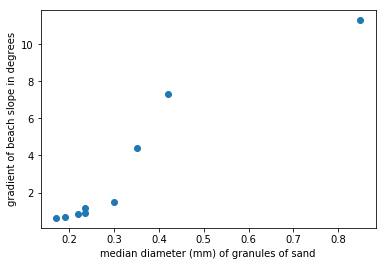

In [2]:
data1 = pd.read_csv("data/Assignment2_data1.csv", header=None)
plt.plot(data1[0],data1[1],'o')
plt.xlabel("median diameter (mm) of granules of sand")
plt.ylabel("gradient of beach slope in degrees")
plt.show()

### Part 1, Q2 -- 5%
Add a column of ones (x0 = 1 ) to the data loaded in the previous question so you can use a vectorized solution in computing the cost and gradients for the next questions, then convert your data to numpy matrixes.Create Theta numpy matrix with dimension of (1, 2).

Note: x, y should have (9, 2), (9, 1) dimensions consequently.


In [3]:
data1[2]= np.ones(len(data1))
x = np.zeros([len(data1),2])
y = np.zeros([len(data1),1])
x[:,0] = data1[0]
x[:,1] = data1[2]
y[:,0] = data1[1]
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix([0,0])

### Part 1, Q3 -- 5%

- Use scikit-learn's linear regression build-in function to find the best model could fit the giving data.
- Print out the model coefficients (Thetas).
- Plot the hypothesis and the data on same plot (hypothesis should fit the data nicely) 
<br>
Note: for scikit-learn package refer to http://scikit-learn.org/stable/

Coefficients: 
 [[17.1593689  0.       ]]


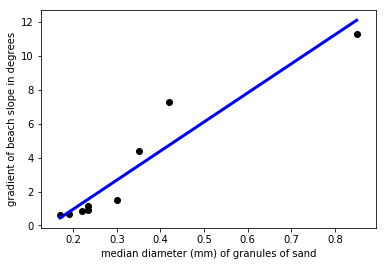

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x, y)
# Make predictions using the testing set
y_pred = regr.predict(x)
# The coefficients
print('Coefficients: \n', regr.coef_)
theta = regr.coef_
# Plot outputs
plt.scatter([x[:,0]], [y],  color='black')
plt.plot(x[:,0], y_pred, color='blue', linewidth=3)
plt.xlabel("median diameter (mm) of granules of sand")
plt.ylabel("gradient of beach slope in degrees")
plt.show()

### Part 1, Q4 -- 5%


In this part you need to create function to compute the cost of a given solution (characterized by the parameters theta).
<img src="img/eq2.png" width = 300>

Make sure the implemented function is working by computing the cost calcVectorizedCost(X, y, theta)of initial solution (0 values for theta) 


In [5]:
theta = np.matrix([0,0])
def calcVectorizedCost(x, y, theta):
    return (1/(2*len(y)))*np.sum(np.square((x.dot(theta.T) - y)))

In [6]:
# Check the cost of the initial conditions here ...
calcVectorizedCost(x,y,theta)

11.458122656667785

### Part 1, Q5 -- 15%

Implement function (gradientDescent) to perform gradient descent on the parameters theta using the update rules:

<img src="img/eq1.png" width = 300>

Note: you should pick alpha that can make your algorithm converge within a reasonable number of iterations (iters). 

In [7]:
def gradientDescent(x,y,theta,alpha,iters):
    cost_history = np.zeros(iters)
    m, n = np.shape(x)
    for i in range (iters):
        #print(theta)
        prediction = x@theta.T
        theta = theta - (1/m)*alpha*((prediction-y).T@x)
        cost_history[i] = calcVectorizedCost(x,y,theta)
    return theta,cost_history

### Part 1, Q6 -- 10%

- Run the gradient descent algorithm implemented in Q4 to fit the parameters theta to the training set.
- print out parameters theta and plot cost error with respect to the training iteration#.
- Plot the fitted linear model to visualize  how well it fits.
- Compare your results with the one found in Q3.


Theta:  [[17.08113774 -2.44915973]]


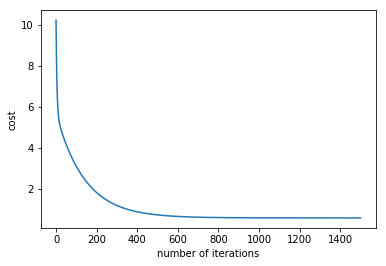

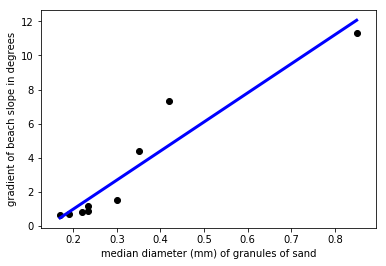

In [8]:
theta_gd,cost_history = gradientDescent(x,y,theta,.1,1500)
print("Theta: ",theta_gd)

plt.plot(cost_history)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

y_hat = x@ theta_gd.T
plt.scatter([x[:,0]], [y],  color='black')
plt.plot(x[:,0], y_hat, color='blue', linewidth=3)
plt.xlabel("median diameter (mm) of granules of sand")
plt.ylabel("gradient of beach slope in degrees")
plt.show()

# Assignment 2 -- Part 2

In this exercise, you will implement logistic regression and apply it to dataset Assignment2_data2.txt

Import and examine the dataset Assignment2_data2.txt. There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted.

In this part of the Assignment, you will build a logistic regression model to predict whether a student gets admitted into a university (a model that estimates an applicant’s probability of admission based the scores from those two exams)


### Part 2, Q1  -- 5%
Visualize the data. X-axis for Exam 1 score, Y-axis for Exam 2 score, + (plus) for admitted, and circle for not admitted. 

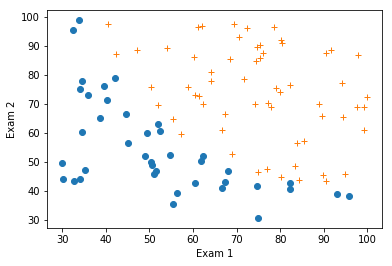

In [9]:
data2 = pd.read_csv("data/Assignment2_data2.txt", header=None)
data2reject = data2.loc[data2[2] == 0]
data2accept = data2.loc[data2[2] == 1]
plt.plot(data2reject[0],data2reject[1],'o')
plt.plot(data2accept[0],data2accept[1],'+')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.show()

### Part 2, Q2  -- 5%

Before you start with the implementation of the cost function and gradient descent algorithm for logistic Regression implement the sigmoid function "sigmoid"  that can be called by the rest of your program. test it when you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

In [10]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

print (sigmoid(100))
print (sigmoid(0))
print (sigmoid(-100))

1.0
0.5
3.7200759760208356e-44


### Part 2, Q2   -- 15%

Implement cost function (calcLogRegressionCost) and gradient descent (logRegressionGradientDescent).   Once you are done,  call your "calcLogRegressionCost" using the initial parameters of θ. You should see that the cost is about 0.693.

Note: no need to add the regularization term. 

In [11]:
x=np.zeros([100,3])
x[:,0]=data2[0]
x[:,1]=data2[1]
x[:,2]= np.ones(len(data2))
x = np.matrix(x)
y=np.zeros([1,100])
y=data2[2]
y=np.matrix(y)
y=y.reshape(100,1)
theta = np.matrix([0,0,0])

def calcLogRegressionCost(x,y,theta):
    first = -y.T*np.log(sigmoid(np.dot(x,theta.T)))
    second = (1-y).T*np.log(1-sigmoid(np.dot(x,theta.T)))
    z = np.sum((first-second)/len(x))
    return z

def logRegGradDescent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost_history = np.zeros(iters)
    for i in range (iters):
        error = sigmoid(x*theta.T)-y
        for j in range (parameters):
            term = error.T @ x[:,j]
            theta[0,j] = theta[0,j] - (alpha*np.sum(term))
        theta=temp
        cost_history[i] = calcLogRegressionCost(x,y,theta)
    return theta, cost_history

print('Cost:', calcLogRegressionCost(x,y,theta))
thetalgd, cost_history = logRegGradDescent(x,y,theta,.00001,600000)

Cost: 0.6931471805599452


### Part 2, Q3   -- 5%

Run the gradient descent algorithm to fit your parameters theta to the training set. Report optimal final θ. Plot the decision boundary with the training data

Optimal Final Theta: [[  0.10669952   0.10066952 -12.68402326]]


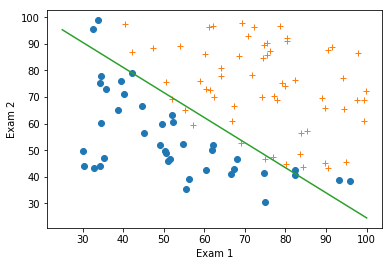

In [12]:
a = np.linspace(25,100,10)  
b = np.matrix(np.zeros(10))
b = -(thetalgd[:,2] + thetalgd[:,1]*a)/thetalgd[:,0]

print("Optimal Final Theta:",thetalgd)
plt.plot(data2reject[0],data2reject[1],'o')
plt.plot(data2accept[0],data2accept[1],'+')
plt.plot(a,b[0].T)
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.show()

### Part 2, Q4  -- 4%

If a student has an Exam 1 score 100 and an Exam 2 score 50, what is the admission probability of this student? 

In [13]:
score = np.array([100,50,1])
model = LogisticRegression()
model.fit(x, y)
theta = model.coef_
prediction = sigmoid(np.dot(score,theta.T))
if (prediction >= .5):
    print("Admitted with Prob:",prediction)
else:
    print("Rejected with Prob:",prediction)

Admitted with Prob: [0.99026411]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Part 2, Q5 -- 5% 
Plot the cost with the number of iterations. what is the best learning rate you choosed and why ?

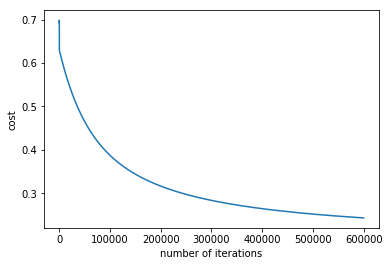

In [14]:
plt.plot(cost_history)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

# I chose alpha = .00001 because a larger alpha will skip over the value and then diverge

# Assignment 2 -- Part 3

In this part of the assignment, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance(QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Import and examine the dataset Assignment2_data3.txt. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. 

### Part 3, Q1 -- 4%
Visualize the data. X-axis for Test 1 score, Y-axis for Test 2 score, + (plus) for accepted, and circle for rejected. 

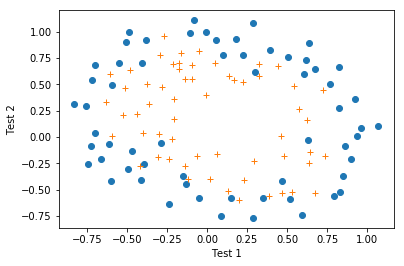

In [15]:
data3 = pd.read_csv("data/Assignment2_data3.txt", header=None)
data3reject = data3.loc[data3[2] == 0]
data3accept = data3.loc[data3[2] == 1]
plt.plot(data3reject[0],data3reject[1],'o')
plt.plot(data3accept[0],data3accept[1],'+')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.show()

x=np.zeros([118,3])
x[:,0]=data3[0]
x[:,1]=data3[1]
x[:,2]= np.ones(len(data3))
y=data3[2]
y = np.matrix(y)
y=y.reshape(118,1)
x = np.matrix(x)
theta = np.matrix(np.zeros([1,28]))

### Part 3, Q2 -- 12%
One way to fit the data better is to create more features from each data
point.  map the features into all polynomial terms of x1 and x2 up to the sixth power.  

<img src="img/polyn6.png" width = 300>

<br> Report optimal final θ. Plot the decision boundary with the training data. 
You can use the cost and GradientDescent algorithms implemented in assignment Part2.

Optimal Final Theta: [[ 3.29652671  2.33663886  3.61886975 -5.07071432 -4.20055571 -5.10172115
   1.05024077 -1.52944529 -0.92626434 -0.35170174 -4.16055212  0.3354639
  -2.23475245 -1.59075422 -3.41816171 -0.62852932 -0.71108172  0.47426327
  -1.33467421 -1.53783033 -0.19921443 -3.32272882  0.40162577 -0.98640428
   0.32061407 -1.34548433 -1.19174029 -1.64587289]]


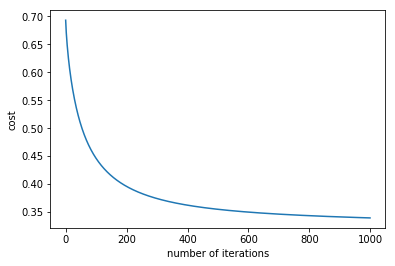

In [16]:
polyF = PolynomialFeatures(6)
mapFeature = polyF.fit_transform(x[:,0:2])
thetalgd, cost_history = logRegGradDescent(mapFeature,y,theta,.009,1000)

print("Optimal Final Theta:",thetalgd)
plt.plot(cost_history)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

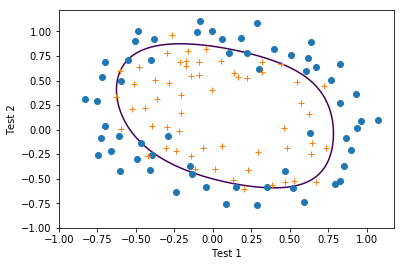

In [17]:
u=np.arange(-1,1,.025)
v=np.arange(-1,1,.025)
z=np.zeros(shape=(len(u),len(v)))

for i in range (len(u)):
    for j in range(len(v)):
        temp = polyF.fit_transform(np.array([[u[i],v[j]]])).dot(np.array(thetalgd.T))
        z[i,j]=temp
z=z.T

plt.plot(data3reject[0],data3reject[1],'o')
plt.plot(data3accept[0],data3accept[1],'+')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.contour(u,v,z,[0])
plt.show()

### Part 3, Q3 -- 12% <u> this part only fo Graduate stundents
Implement Regularized Logistic Regression cost function and gradient descent namely (calcRegularizedLogRegressionCost, RegularizedlogRegressionGradientDescent) . Plot the cost with the number of iterations.

### Part 3, Q4 -- 12%, <u> this part only fo Graduate stundents
Demonstrate the impact of the regularization parameter λ with 1, 0, 100, 1000. Plot the decision boundary of for the 4 different λ values. 



In [ ]:
###### CODE GRAVE

def lrgd(x,y,theta,alpha,iters):
    cost_history = np.zeros(iters)
    parameters = int(theta.ravel().shape[1])
    for i in range (iters):
        cost_history[i] = calcLogRegressionCost(x,y,theta)
        predicted = sigmoid(x*theta.T)
        #print(theta)
        for j in range (parameters):
            diff = predicted - y
            error = diff *x[:,j]
            theta[0,j]=theta[0,j]-(alpha*error.sum())     
    return theta,cost_history

def lrgd2(x,y,theta,alpha,iters):
    cost_history = np.zeros(iters)
    m = x.shape[0]
    for i in range (iters):
        cost_history[i] = calcLogRegressionCost(x,y,theta)
        h = sigmoid(np.matmul(x, theta.T))
        grad = np.matmul(x.T, (h - y.T)) / m
        theta = theta - (alpha* grad).T   
    return theta,cost_history


def lrgd3(x,y,theta,alpha,iters):
    cost_history = np.zeros(iters)
    n = len(x)
    for i in range (iters):
        grad = (1/n)*(sigmoid(np.dot(theta,x.T))-y.T).dot(x)
        #print(grad.shape)
        theta = theta - (alpha* grad)
        cost_history[i] = calcLogRegressionCost(x,y,theta)
    return theta,cost_history




model = LogisticRegression()
model.fit(x, y)
theta = model.coef_
print(theta)

y_hat = sigmoid(x*theta.T)*100
y_hatSort = np.zeros([1,100])
for index, elm in enumerate(y_hat):
    y_hatSort[0,index] = elm
xSort = np.zeros([1,100])
for index, elm in enumerate(x[:,0]):
    xSort[0,index] = elm

plt.plot(data2reject[0],data2reject[1],'o')
plt.plot(data2accept[0],data2accept[1],'+')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.plot(sorted(xSort[0]), sorted(y_hatSort[0],reverse=True), color='blue', linewidth=3)
plt.show()



y_hatSort = np.zeros([1,100])
y_hat = x*thetalgd.T
for index, elm in enumerate(y_hat):
    y_hatSort[0,index] = elm
xSort = np.zeros([1,100])
for index, elm in enumerate(x[:,0]):
    xSort[0,index] = elm